In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
# Input the data set
df = pd.read_csv("/content/50_Startups.csv")
df.head(5)
##In case you want to view data plots un-comment the following lines
#fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
#fig.figsize = (10, 10)
#ax[0, 0].scatter(df['Profit'], df['R&D Spend'],color = 'red')
#ax[0, 1].scatter(df['Profit'], df['Administration'],color = 'yellow')
#ax[1, 0].scatter(df['Profit'], df['Marketing Spend'], color ='green')
#ax[1, 1].scatter(df['Profit'], df['State'],color = 'blue')
#plt.tight_layout()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Define features and labels
x = df.iloc[:,:-1].values # Selecting all columns except the last column
y = df.iloc[:,-1].values
print("Sample x:",  x[0:5,:])
print("Sampe y: ", y[0:5])

Sample x: [[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]
Sampe y:  [192261.83 191792.06 191050.39 182901.99 166187.94]


In [5]:
# Convert text data to numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))


**EXPLANATION**

When remainder = 'passthrough' is mentioned, then the other columns which weren't mentioned in the transformers will also be transformed and included in the output or else it would be dropped by default.. 

In [6]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
#print("Data before Scaling:\n", x[0:10,:])
sc = StandardScaler()
x = sc.fit_transform(x)
#print("Data AfterScaling:\n", x[0:10,:])

In [7]:
# Separate the dataset into training and testing## Define features and labels
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)


In [8]:
# Creating the cost and gradient function
#calculate cost
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [9]:
#Gradient Descent
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost at epoch",epoch,"is:",cost)
        
    return w, b, cost_list

In [10]:
# Calculating weights and bias
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)
#38791988.606615104 is lowest cost achieved

Cost at epoch 0 is: 6989316078.6237135
Cost at epoch 1500 is: 93910079.250253
Cost at epoch 3000 is: 52213406.46017957
Cost at epoch 4500 is: 44053387.931024216
Cost at epoch 6000 is: 41718884.2933599
Cost at epoch 7500 is: 41048136.3698332
Cost at epoch 9000 is: 40855409.29807189
Cost at epoch 10500 is: 40800032.69430475
Cost at epoch 12000 is: 40784121.23860738
Cost at epoch 13500 is: 40779549.37241818


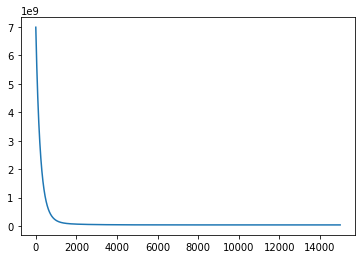

In [11]:
# Plotting the cost
plt.plot(c)

In [12]:
# Predicting labels with the calculated weights and biases
def predict(X, w, b):
    return X.dot(w) + b

In [13]:
y_pred = predict(Xtest, w, b)

In [14]:
# Calculating the r² accuracy of our model
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [15]:
r2score(y_pred, Ytest)

0.9397254670323116

**EXERCISE 2**

Link to the dataset: https://drive.google.com/file/d/1qwBmSvG1Od1Yjbmn14eXEyl_f4Fi0okq/view?usp=sharing

In [46]:
df = pd.read_csv('/content/basketball.csv')
df.head(5)

,height,weight,field_goals,free_throws
0,6.8,225,0.442,0.672
1,6.3,180,0.435,0.797
2,6.4,190,0.456,0.761
3,6.2,180,0.416,0.651
4,6.9,205,0.449,0.900


In [47]:
x = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values
print("Independent variable:\n",  x[0:5,:])
print("Dependent variable:\n ", y[0:5])

Independent variable:
 [[  6.8   225.      0.442]
 [  6.3   180.      0.435]
 [  6.4   190.      0.456]
 [  6.2   180.      0.416]
 [  6.9   205.      0.449]]
Dependent variable:
  [0.672 0.797 0.761 0.651 0.9  ]


In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [74]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
y_pred

array([0.73772384, 0.73324024, 0.76897557, 0.69290696, 0.7445807 ,
       0.73836867, 0.72183512, 0.70883203, 0.78811974, 0.80297954,
       0.77414257])

In [51]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [57]:
w, b, c = GradientDescent(x_train, y_train, np.zeros(x_train.shape[1]), 0, 0.002,epochs=15000)

Cost at epoch 0 is: 0.28359875183387384
Cost at epoch 1500 is: 0.006004213913918493
Cost at epoch 3000 is: 0.00522418078829362
Cost at epoch 4500 is: 0.0051866918864058005
Cost at epoch 6000 is: 0.005172231426597487
Cost at epoch 7500 is: 0.005166368042651776
Cost at epoch 9000 is: 0.005163989026453713
Cost at epoch 10500 is: 0.005163023719321053
Cost at epoch 12000 is: 0.005162632035328211
Cost at epoch 13500 is: 0.005162473105141417


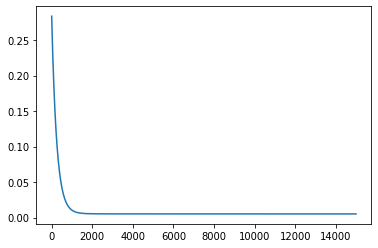

In [58]:
plt.plot(c)

In [59]:
def predict(X, w, b):
    return X.dot(w) + b

In [67]:
y_pred_grad = predict(x_test, w, b)
y_pred_grad

array([0.73661717, 0.73258562, 0.76905528, 0.69286408, 0.74473405,
       0.73833914, 0.72158764, 0.70891606, 0.78807536, 0.80314742,
       0.77402328])

**Calculating accuracy**

In [73]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [72]:
r2score(y_pred, y_test)

0.08531028730783374

In [78]:
print('y_prediction \t\t y_prediction_gradient')
for i in range(y_pred.size):
  print(y_pred[i],'\t', y_pred_grad[i])

y_prediction 		 y_prediction_gradient
0.7377238366604384 	 0.7366171713319649
0.7332402395975433 	 0.7325856242605139
0.7689755747788048 	 0.7690552819115665
0.6929069607789627 	 0.6928640782240911
0.7445807011480811 	 0.7447340479938931
0.7383686722898575 	 0.7383391434567858
0.7218351191574883 	 0.7215876352395388
0.7088320251682794 	 0.7089160574717728
0.7881197445550666 	 0.7880753582825692
0.8029795369943311 	 0.803147417254388
0.7741425669015922 	 0.7740232819231205
